In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from sqlalchemy import create_engine

In [2]:
PG_HOST = '172.17.0.2'
pg_engine = create_engine(f'postgresql+psycopg2://postgres:password@{PG_HOST}/habr', pool_recycle=3600)
pg_conn = pg_engine.connect()

In [3]:
import pandas as pd

posts_df = pd.read_sql("select * from posts", pg_conn)
print("Posts count: ", len(posts_df))
posts_df.head(2)

Posts count:  232127


post_id                                              title  \
0   365293  LinkedIn автоматизировал добавление в профиль ...   
1     5005  MobileFaker: фальшивые звонки как социальное о...   

                                                text                date  \
0  Разработчики LinkedIn объявили о появившейся в... 2015-03-26 16:32:00   
1  Со своего мобильника вы заказываете фальшивый ... 2007-01-26 14:39:00   

   views_count  comments_count  bookmarks_count rating author_nickname  
0         7300               1               10     +8       Teachbase  
1          315              17                2    +16          alizar

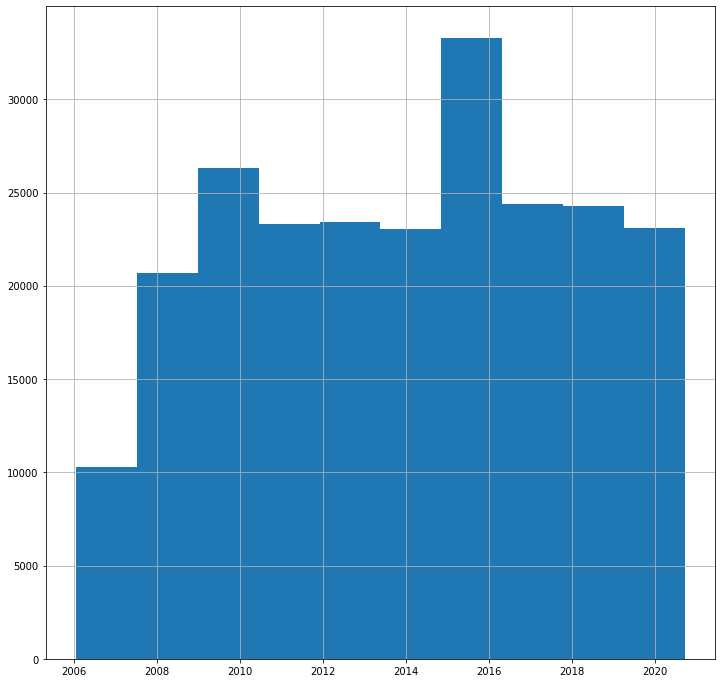

In [4]:
plt.figure(figsize=(12, 12))
posts_df['date'].hist()
plt.show()

In [5]:
tags_df = pd.read_sql("select * from tags", pg_conn)
print("tags_df len: ", len(tags_df))
tags_df.head(2)

tags_df len:  1054820


post_id           tag
0   365293      LinkedIn
1   365293  онлайн-курсы

In [6]:
habs_df = pd.read_sql("select * from habs", pg_conn)
print("tags_df len: ", len(habs_df))
habs_df.head(2)

tags_df len:  447893


post_id                           hab
0   365293    Блог компании Teachbase.ru
1   365293  Социальные сети и сообщества

In [7]:
habs_df['hab'].value_counts()

Чулан                              29221
Разработка веб-сайтов              12309
Программирование                   11680
Информационная безопасность        11232
IT-компании                         8710
                                   ...  
Блог компании 5518 Studios             1
Блог компании Проект Доминикана        1
Блог компании DroneDesign              1
Блог компании Talenthouse              1
Блог компании centos-admin.ru          1
Name: hab, Length: 2269, dtype: int64

In [7]:
tags_df['tag'].value_counts()

javascript       4473
android          4011
google           3726
linux            3274
php              3224
                 ... 
method size         1
боны                1
applicatives        1
Дугин               1
stereo player       1
Name: tag, Length: 204532, dtype: int64

In [36]:
habs_l = ['Математика']
# habs_l = ['Машинное обучение']

habs_df[habs_df['hab'].isin(habs_l)]

post_id         hab
49       415333  Математика
56       255205  Математика
206      450368  Математика
549      245211  Математика
822      445392  Математика
...         ...         ...
446501   475370  Математика
446762   114906  Математика
447024   245133  Математика
447207   240145  Математика
447519   485342  Математика

[2171 rows x 2 columns]

In [26]:
math_tags = ['математика', 'криптография', 'матан', 'математический анализ', 'линейная алгебра']
nn_tags = ['машинное обучение', 'нейронные сети']

def get_posts_by_tags(tags_list: list) -> pd.DataFrame:
    posts_ids_arr = tags_df[tags_df['tag'].isin(tags_list)]['post_id'].values
    return posts_df[posts_df['post_id'].isin(np.unique(arr))]

get_posts_by_tags(nn_tags)

post_id                                              title  \
139      280296  Как навести порядок в почтовом ящике с помощью...   
165      150130                 Русские субтитры в курсах Coursera   
679      170143  Как Google изменил Android при помощи вашего м...   
938      350346           Знакомство с рекомендательными системами   
1474     450376       Как в Яндекс.Такси ищут машины, когда их нет   
...         ...                                                ...   
231463   245051  Руководство хакера по нейронным сетям. Схемы р...   
231595   485290            Простое руководство по дистилляции BERT   
231824   480378  14 open-source проектов для прокачки Data Scie...   
231901   245125       Немцы создали библиотеку пьяных аудиозаписей   
232081   120086  Устройство слежения за движущимся источником с...   

                                                     text                date  \
139     \n\nВ нашем блоге мы много пишем о создании em... 2016-03-28 10:31:00   
165     Это уже не первая на хабре статья про курсы, п... 2012-08-23 19:58:00   
679     В последней версии мобильной операционной сист... 2013-02-20 22:36:00   
938     Привет, Хабр!\n\nДавайте вернемся к периодичес... 2018-03-02 18:28:00   
1474    \n\nХороший сервис для заказа такси должен быт... 2019-05-14 11:11:00   
...                                                   ...                 ...   
231463  Содержание:\nГлава 1: Схемы реальных значенийЧ... 2014-12-05 00:22:00   
231595  Если вы интересуетесь машинным обучением, то н... 2020-01-29 18:26:00   
231824   Data Science для начинающих\n\n1. Sentiment A... 2019-12-15 21:39:00   
231901  Эпиграф:\n — Пил?\n — Не пил!\n — Скажи Гибрал... 2014-12-05 15:30:00   
232081  Сегодня я решил написать об одном интересном п... 2011-05-27 09:54:00   

        views_count  comments_count  bookmarks_count rating author_nickname  
139            7500               1               64    +11         lol_wat  
165           29500              30              419    +46         Alice_F  
679           56900              40               80    +64   Apps4All_post  
938           11000               3               74    +16        ph_piter  
1474          34300              58               69    +40           vomar  
...             ...             ...              ...    ...             ...  
231463        15500               0              157    +20        Irina_Ua  
231595         5600               3               64    +28        pgladkov  
231824        16200               5              279    +15   rishat_edison  
231901        21100              33               33    +27       Maslukhin  
232081        12300              39               48    +42          avrfun  

[1588 rows x 9 columns]

In [42]:
from typing import Generator
import psycopg2


class PostgresStorage:

    def __init__(self, conn):
        self.conn = conn
        self.cursor = conn.cursor()

    @staticmethod
    def connect(host, port=5432, user='postgres', password='password', dbname='habr'):
        return PostgresStorage(conn=psycopg2.connect(
            host=host, port=port, user=user, password=password, dbname=dbname)
        )

    
    def get_posts(self, habs_list: list = None, tags_list: list = None, count=0) -> Generator:
        if not habs_list and not tags_list:
            sql = 'SELECT * FROM posts'
            sql = sql + 'LIMIT %d' % count if count > 0 else sql
            self.cursor.execute(sql)
        elif habs_list:
            self.__get_posts_by_habs(habs_list, count)
        elif tags_list:
            self.__get_posts_by_tags(tags_list, count)
        posts_gen = (post for post in self.cursor.fetchall())
        return posts_gen
    
    def get_posts_texts(self, habs_list: list = None, tags_list: list = None, count=0) -> Generator:
        posts_texts_gen = (post[2] for post in self.get_posts(habs_list, tags_list, count))
        return posts_texts_gen
    
    
    def __get_posts_by_habs(self, habs_list: list, count=0) -> None:
        sql = '''SELECT P.* 
                   FROM posts P JOIN habs H ON P.post_id = H.post_id
                  WHERE H.hab in (%s)''' % ''.join(["'" + str(hab) + "', " for hab in habs_list])[:-2]
        sql = sql + " LIMIT %d" % count if count > 0 else sql
        self.cursor.execute(sql)

    def __get_posts_by_tags(self, tags_list: list, count=0) -> None:
        sql = '''SELECT P.* 
                   FROM posts P JOIN tags T ON P.post_id = T.post_id
                  WHERE T.tag in (%s)''' % ''.join(["'" + str(tag) + "', " for tag in tags_list])[:-2]
        sql = sql + " LIMIT %d" % count if count > 0 else sql
        self.cursor.execute(sql)    

In [46]:
pg_storage = PostgresStorage.connect('172.17.0.2')
list(pg_storage.get_posts_texts(habs_list=['Математика'], count=5))

['\nУ многих еще остались радиоприёмники с диапазонами СВ и ДВ, и радиолюбительский интерес к приёму в этих диапазонах также по-прежнему сохраняется. На средних волнах в условиях отсутствия помех (за городом, в парке, на балконе, с внешней антенной или, в крайнем случае, у окна квартиры) в вечернее время принимается много удаленных радиостанций, но днем в эфире слышны только шумы. В диапазоне ДВ радиостанций не осталось совсем.\n\nИсправить положение можно с помощью простого маломощного радиопередатчика, действующего в радиусе нескольких метров. В процессе сборки одной из таких конструкций у автора родилась идея попытаться сделать такой передатчик на базе Arduino.\n\nОсновные требования к устройству: имеющаяся в наличии плата Arduino UNO или Arduino Leonardo, максимальная простота электрической схемы (не сложнее самых простых передатчиков на одном транзисторе) и удовлетворительное для АМ-диапазона качество звучания.\n\nВ качестве несущей для наших целей можно использовать сигнал прямоу

# Join habs, tags and posts

In [8]:
def get_habs_list(post_id: int) -> str:
    habs = ''
    for _, row in habs_df[habs_df['post_id'] == post_id].iterrows():
        habs += (row['hab'] + '<SEP>')
    return habs[:-5]

get_habs_list(5005)

'Чулан'

In [9]:
def get_tags_list(post_id: int) -> str:
    tags = ''
    for _, row in tags_df[tags_df['post_id'] == post_id].iterrows():
        tags += (row['tag'] + '<SEP>')
    return tags[:-5]

get_tags_list(5005)

'MobileFaker<SEP>фальшивые звонки<SEP>лицемерие<SEP>мобильные услуги<SEP>соци'

In [10]:
posts_df['habs'] = posts_df.apply(lambda x: get_habs_list(x['post_id']), axis=1)
posts_df['tags'] = posts_df.apply(lambda x: get_tags_list(x['post_id']), axis=1)
posts_df.head(2)

post_id                                              title  \
0   365293  LinkedIn автоматизировал добавление в профиль ...   
1     5005  MobileFaker: фальшивые звонки как социальное о...   

                                                text                date  \
0  Разработчики LinkedIn объявили о появившейся в... 2015-03-26 16:32:00   
1  Со своего мобильника вы заказываете фальшивый ... 2007-01-26 14:39:00   

   views_count  comments_count  bookmarks_count rating author_nickname  \
0         7300               1               10     +8       Teachbase   
1          315              17                2    +16          alizar   

                                                habs  \
0  Блог компании Teachbase.ru<SEP>Социальные сети...   
1                                              Чулан   

                                                tags  
0  LinkedIn<SEP>онлайн-курсы<SEP>сертификаты<SEP>...  
1  MobileFaker<SEP>фальшивые звонки<SEP>лицемерие...

In [11]:
habs_dict = dict(habs_df['hab'].value_counts())
habs_list = list(habs_dict.keys())
len(habs_dict), list(habs_dict.items())[:1]

(2269, [('Чулан', 29221)])

In [12]:
tags_dict = dict(tags_df['tag'].value_counts())
tags_list = list(tags_dict.keys())
len(tags_dict), list(tags_dict.items())[:1]

(204532, [('javascript', 4473)])

In [13]:
class Habs2Vec:
    
    habs2code: dict
    code2hab: dict
    
    def fit(self, habs_list: list) -> None:
        self.habs2code = {hab: i for i, hab in enumerate(habs_list)}
        self.code2hab = {i: hab for i, hab in enumerate(habs_list)}
        
    def transform(self, post_habs: list) -> np.array:
        vec = np.zeros(len(self.habs2code), dtype=np.int0)
        for hab in post_habs:
            vec[self.habs2code[hab]] = 1
        return vec
    
    def encode_vec(self, vec: np.array) -> list:
        habs = []
        for i, elem in enumerate(vec):
            if elem:
                habs.append(self.code2hab[i])
        return habs
    
transformer = Habs2Vec()
transformer.fit(habs_list)
print('Habs: ', habs_list[:2] + habs_list[-2:])
vec = transformer.transform(habs_list[:2] + habs_list[-2:])
print('Binary vector: ', vec)
print('Decoded binary vector: ', transformer.encode_vec(vec))

Habs:  ['Чулан', 'Разработка веб-сайтов', 'Блог компании BugHunt', 'Блог компании Track Task']
Binary vector:  [1 1 0 ... 0 1 1]
Decoded binary vector:  ['Чулан', 'Разработка веб-сайтов', 'Блог компании BugHunt', 'Блог компании Track Task']


In [14]:
decoded_habs_list = [transformer.transform(post['habs'].split('<SEP>')) for _, post in tqdm.tqdm(posts_df.iterrows())]
len(decoded_habs_list), decoded_habs_list[:2]

232127it [00:18, 12670.35it/s]


(232127, [array([0, 0, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 0, 0, 0])])

In [17]:
import json

with open('decoded_habs_list.json', 'w') as f:
    for vec in tqdm.tqdm(decoded_habs_list):
        f.write(json.dumps(list([int(v) for v in vec])))
        f.write('\n')

100%|██████████| 232127/232127 [01:56<00:00, 1989.26it/s]


In [19]:
authors_list = list({post['author_nickname'] for _, post in posts_df.iterrows()})
len(authors_list)

38349

In [29]:
habs_stat = {
    hab: {
        'comments_count': 0,
        'rating': 0,
        'bookmarks_count': 0,
        'views_count': 0,
        'authors_set': set(),
        'count': 0
    } for hab in habs_list}
tags_stat = {
    tag: {
        'comments_count': 0,
        'rating': 0,
        'bookmarks_count': 0,
        'views_count': 0,
        'authors_set': set(),
        'count': 0
    } for tag in tags_list}
authors_stat = {
    author: {
        'comments_count': 0,
        'rating': 0,
        'bookmarks_count': 0,
        'views_count': 0,
        'habs_set': set(),
        'tags_set': set(),
        'count': 0
    } for author in authors_list}

def parse_rating(rating: str) -> int:
    if rating[0] == '–':
        return -int(rating[1:])
    return int(rating)

for _, post in tqdm.tqdm(posts_df.iterrows()):
    post_id = post['post_id']
    author = post['author_nickname']
    comments_count = post['comments_count']
    views_count = post['views_count']
    bookmarks_count = post['bookmarks_count']
    authors_stat[author]['count'] += 1
    rating = parse_rating(str(post['rating']).strip())
    habs = str(post['habs']).split('<SEP>')
    tags = str(post['tags']).split('<SEP>')
    
    authors_stat[author]['comments_count'] += comments_count
    authors_stat[author]['views_count'] += views_count
    authors_stat[author]['bookmarks_count'] += bookmarks_count
    authors_stat[author]['count'] += 1
    authors_stat[author]['rating'] += rating
    authors_stat[author]['habs_set'] |= set(habs)
    authors_stat[author]['tags_set'] |= set(tags)
    
    for hab in habs:
        habs_stat[hab]['comments_count'] += comments_count
        habs_stat[hab]['bookmarks_count'] += bookmarks_count
        habs_stat[hab]['views_count'] += views_count
        habs_stat[hab]['authors_set'].add(author)
        habs_stat[hab]['rating'] += rating
        habs_stat[hab]['count'] += 1  
        
    for tag in tags:
        tags_stat[tag]['comments_count'] += comments_count
        tags_stat[tag]['bookmarks_count'] += bookmarks_count
        tags_stat[tag]['views_count'] += views_count
        tags_stat[tag]['authors_set'].add(author)
        tags_stat[tag]['rating'] += rating
        tags_stat[tag]['count'] += 1    

print('Habs stat item:', list(habs_stat.items())[:1])
print('Tags stat item:', list(tags_stat.items())[:1])
print('Authors stat item:', list(authors_stat.items())[:1])

232127it [00:35, 6480.89it/s]

Habs stat item: [('Чулан', {'comments_count': 605766, 'rating': 205596, 'bookmarks_count': 137265, 'views_count': 20280127, 'authors_set': {'freiman', 'RUQ', 'Antares19', 'ALIron', 'platinum07', 'mmx', 'yamalight', 'Akram', 'intenter', 'unclegluk', 'kpblca', 'MTonly', 'Ruster', 'Glow', 'vvovas', 'cadovvl', 'LaCroix', 'Jahar', 'webRunes', 'Imbolc', 'animalism2', 'silvergh0st', 'Lipa', 'Apostol', 'Tronum', 'Reznikov', 'metalink', 'readysteady', 'heoh', 'M4rkK1d', 'biblos', 'dust', 'toxa', 'vityasev', 'Commandante', 'lordik', 'aleksey_druzhinin', 'DmitryKoterov', 'britoff', 'stardust_kid', 'penexe', 'denisf', 'gulevich', 'vo0d', 'Hellcat', 'Tims', 'unu', 'alevtino4ka', '21csm', 'meettya', 'vorobyev', 'NjabuloJahra', 'lvea', 'Shweda', 'alex_bio', 'FuPro', 'MrJeka', 'Ecugool', 'overday', 'hrebet', 'Grushevskiy', 'denisnikulin', 'Chronicler', 'umonkey', 'xbons', 'bliznezz', 'GambiTst', 'dimazub', 'oshoss', 'Semenov', 'Alex--T', 'adeator', 'steff', 'har1ton', 'alexanderST', 'cherry', 'dinozav

In [103]:
habs_stat_df = pd.DataFrame({
    'hab': list(habs_stat),
    'views_count': [habs_stat[hab]['views_count'] // habs_stat[hab]['count'] for hab in habs_stat],
    'comments_count': [habs_stat[hab]['comments_count'] // habs_stat[hab]['count'] for hab in habs_stat],
    'bookmarks_count': [habs_stat[hab]['bookmarks_count'] // habs_stat[hab]['count'] for hab in habs_stat],
    'rating': [habs_stat[hab]['rating'] // habs_stat[hab]['count'] for hab in habs_stat],
    'count': [habs_stat[hab]['count'] for hab in habs_stat]
})
habs_stat_df.head(10)

hab  views_count  comments_count  bookmarks_count  \
0                        Чулан          694              20                4   
1        Разработка веб-сайтов        26569              32              138   
2             Программирование        24840              33              114   
3  Информационная безопасность        25108              41               72   
4                  IT-компании        10664              49               17   
5            Научно-популярное        19957              59               41   
6                   JavaScript        23922              26              131   
7                      Гаджеты        18933              45               31   
8                    Я пиарюсь         3596              41               35   
9          Компьютерное железо        20403              52               38   

   rating  count  
0       7  29221  
1      27  12309  
2      26  11680  
3      31  11232  
4      24   8710  
5      28   7804  
6      24   6585  
7      20   6508  
8      24   5564  
9      26   4840

In [102]:
tags_stat_df = pd.DataFrame({
    'tag': list(tags_stat),
    'views_count': [tags_stat[tag]['views_count'] // tags_stat[tag]['count'] for tag in tags_stat],
    'comments_count': [tags_stat[tag]['comments_count'] // tags_stat[tag]['count'] for tag in tags_stat],
    'bookmarks_count': [tags_stat[tag]['bookmarks_count'] // tags_stat[tag]['count'] for tag in tags_stat],
    'rating': [tags_stat[tag]['rating'] // tags_stat[tag]['count'] for tag in tags_stat],
    'count': [tags_stat[tag]['count'] for tag in tags_stat]
})
tags_stat_df.head(10)

tag  views_count  comments_count  bookmarks_count  rating  \
0        javascript        21386              30              118      25   
1           android        22546              31               70      23   
2            google        10986              39               29      24   
3             linux        25097              43               99      30   
4               php        19032              39               94      21   
5            python        24047              24              117      26   
6              java        25873              23               93      20   
7  программирование        25108              40              106      26   
8        разработка        20781              27              107      25   
9         microsoft        10352              40               23      20   

   count  
0   4473  
1   4011  
2   3726  
3   3274  
4   3224  
5   3022  
6   3004  
7   2923  
8   2862  
9   2749

In [101]:
authors_stat_df = pd.DataFrame({
    'author': list(authors_stat),
    'views_count': [authors_stat[author]['views_count'] // authors_stat[author]['count'] for author in authors_stat],
    'comments_count': [authors_stat[author]['comments_count'] // authors_stat[author]['count'] for author in authors_stat],
    'bookmarks_count': [authors_stat[author]['bookmarks_count'] // authors_stat[author]['count'] for author in authors_stat],
    'rating': [authors_stat[author]['rating'] // authors_stat[author]['count'] for author in authors_stat],
    'count': [authors_stat[author]['count'] for author in authors_stat]
})
authors_stat_df.head(10)

author  views_count  comments_count  bookmarks_count  rating  \
0           freiman         8163              19               12       6   
1               RUQ         1480              18               15      10   
2          shmidt-m         6621              21               13       1   
3             Altf1          172               2                1       0   
4             bvrmn         2550              32               21       7   
5              wizp         8050               2               35       1   
6           shane54          178               0                0       0   
7  ArkadyBagdasarov         1650               2               12       7   
8             Akram           80               8                1       5   
9       ViktoriaTok         5900               3               11      12   

   count  
0     20  
1     74  
2     14  
3      2  
4      2  
5      2  
6      2  
7      2  
8      2  
9      2

In [158]:
import matplotlib.pyplot as plt

count_threshold = 500
figsize = (10, 10)

# Statistics plots

## Most viewed

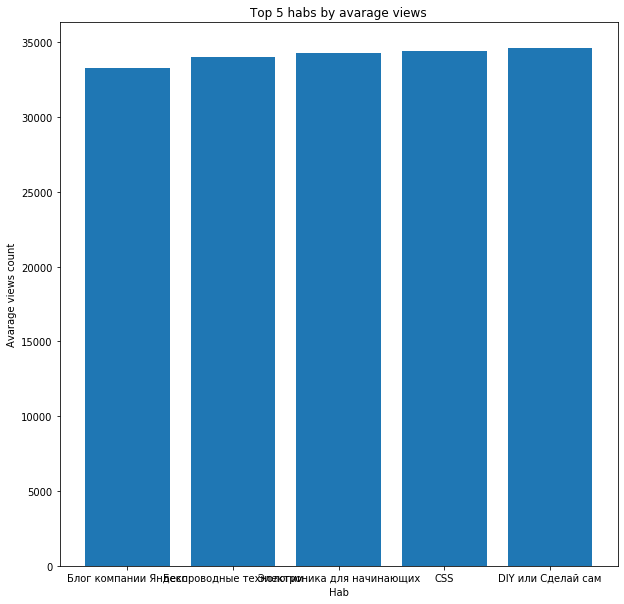

In [159]:
plt.figure(figsize=figsize)
top_views_habs = habs_stat_df[habs_stat_df['count'] > count_threshold].sort_values('views_count').tail(5)
plt.title('Top 5 habs by avarage views')
plt.bar(top_views_habs['hab'].values, top_views_habs['views_count'].values)
plt.xlabel('Hab')
plt.ylabel('Avarage views count')
plt.show()

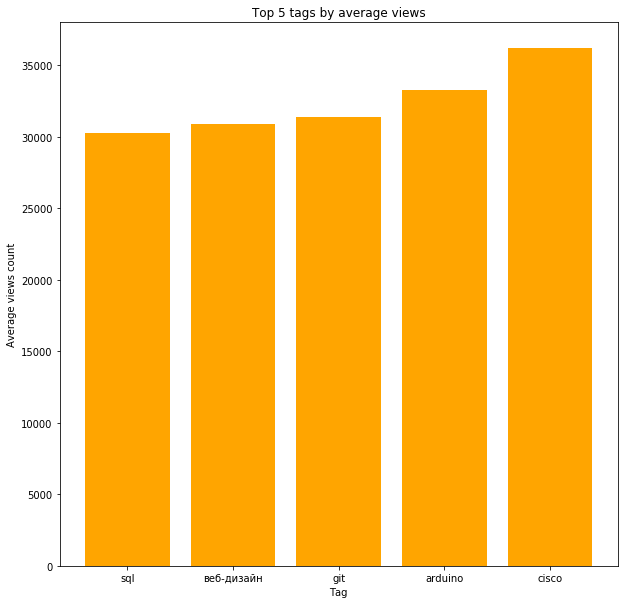

In [160]:
plt.figure(figsize=figsize)
top_views_tags = tags_stat_df[tags_stat_df['count'] > count_threshold].sort_values('views_count').tail(5)
plt.title('Top 5 tags by average views')
plt.bar(top_views_tags['tag'].values, top_views_tags['views_count'].values, color='orange')
plt.xlabel('Tag')
plt.ylabel('Average views count')
plt.show()

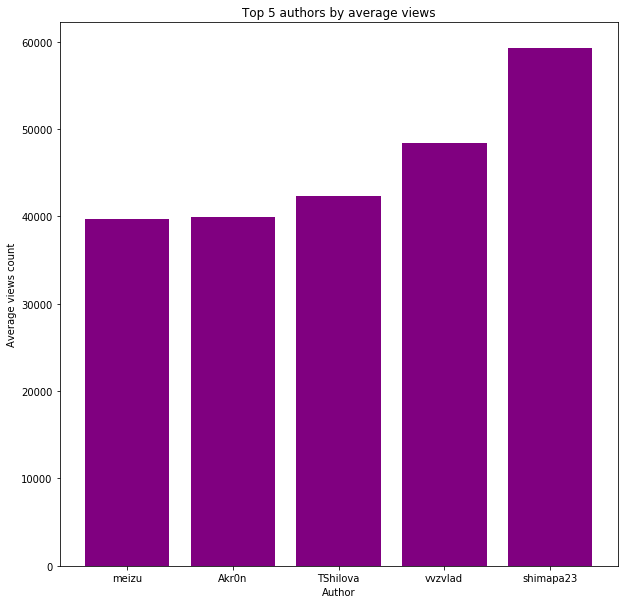

In [161]:
plt.figure(figsize=figsize)
top_authors_tags = authors_stat_df[authors_stat_df['count'] > count_threshold // 10].sort_values('views_count').tail(5)
plt.title('Top 5 authors by average views')
plt.bar(top_authors_tags['author'].values, top_authors_tags['views_count'].values, color='purple')
plt.xlabel('Author')
plt.ylabel('Average views count')
plt.show()

## Most rated

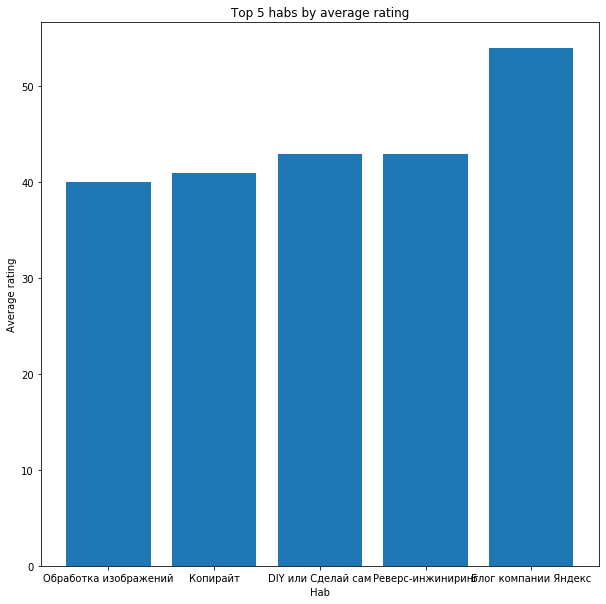

In [162]:
plt.figure(figsize=figsize)
top_rating_habs = habs_stat_df[habs_stat_df['count'] > count_threshold].sort_values('rating').tail(5)
plt.title('Top 5 habs by average rating')
plt.bar(top_rating_habs['hab'].values, top_rating_habs['rating'].values)
plt.xlabel('Hab')
plt.ylabel('Average rating')
plt.show()

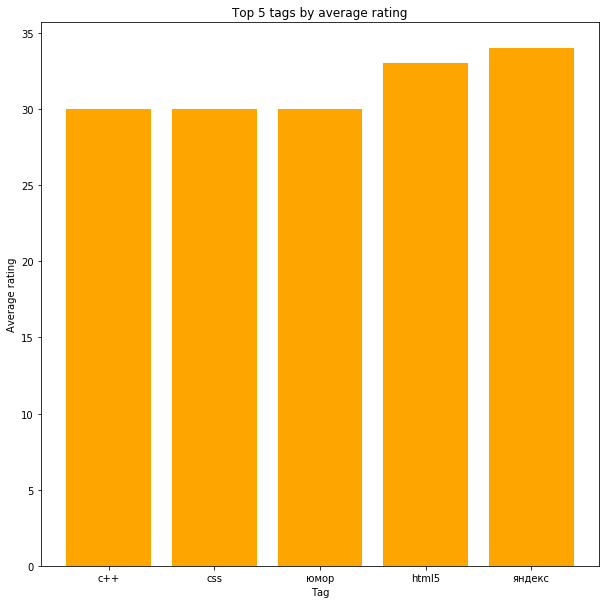

In [163]:
plt.figure(figsize=figsize)
top_rating_tags = tags_stat_df[tags_stat_df['count'] > 1000].sort_values('rating').tail(5)
plt.title('Top 5 tags by average rating')
plt.bar(top_rating_tags['tag'].values, top_rating_tags['rating'].values, color='orange')
plt.xlabel('Tag')
plt.ylabel('Average rating')
plt.show()

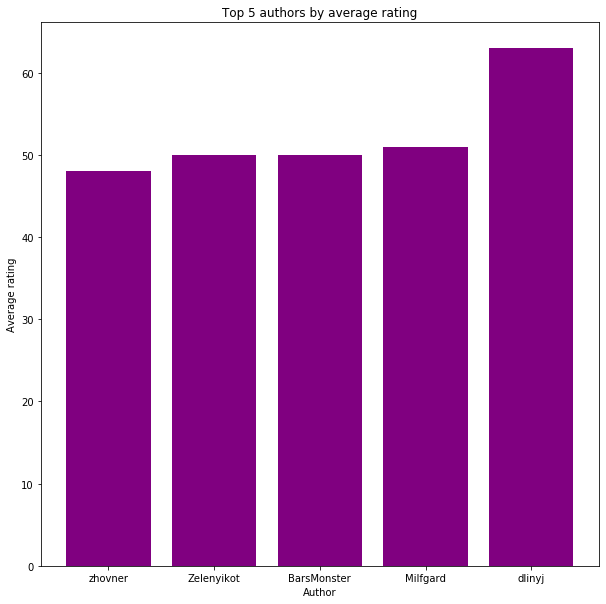

In [164]:
plt.figure(figsize=figsize)
top_rating_authors = authors_stat_df[authors_stat_df['count'] > count_threshold // 10].sort_values('rating').tail(5)
plt.title('Top 5 authors by average rating')
plt.bar(top_rating_authors['author'].values, top_rating_authors['rating'].values, color='purple')
plt.xlabel('Author')
plt.ylabel('Average rating')
plt.show()

## Most bookmarked

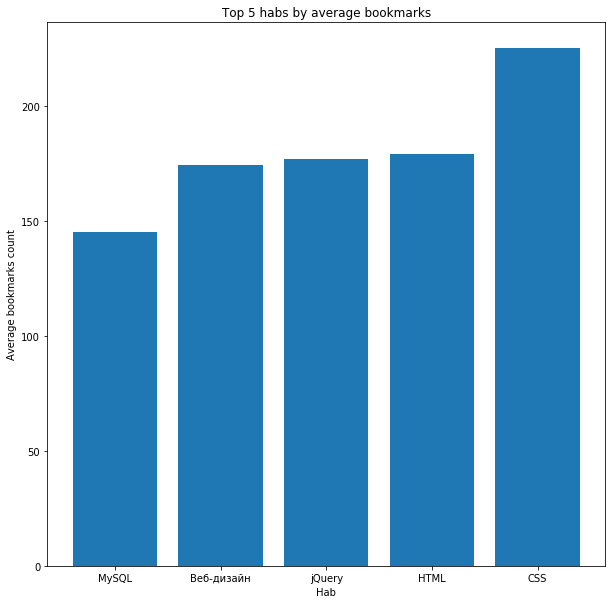

In [165]:
plt.figure(figsize=figsize)
top_bookmarks_habs = habs_stat_df[habs_stat_df['count'] > count_threshold].sort_values('bookmarks_count').tail(5)
plt.title('Top 5 habs by average bookmarks')
plt.bar(top_bookmarks_habs['hab'].values, top_bookmarks_habs['bookmarks_count'].values)
plt.xlabel('Hab')
plt.ylabel('Average bookmarks count')
plt.show()

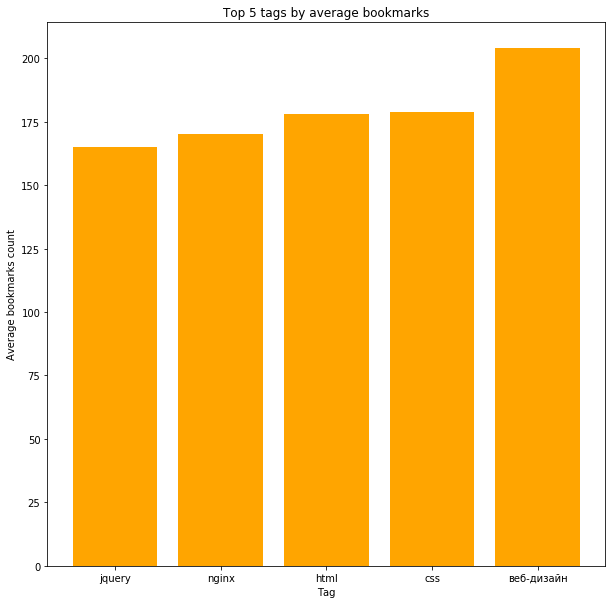

In [166]:
plt.figure(figsize=figsize)
top_bookmarks_tags = tags_stat_df[tags_stat_df['count'] > count_threshold].sort_values('bookmarks_count').tail(5)
plt.title('Top 5 tags by average bookmarks')
plt.bar(top_bookmarks_tags['tag'].values, top_bookmarks_tags['bookmarks_count'].values, color='orange')
plt.xlabel('Tag')
plt.ylabel('Average bookmarks count')
plt.show()

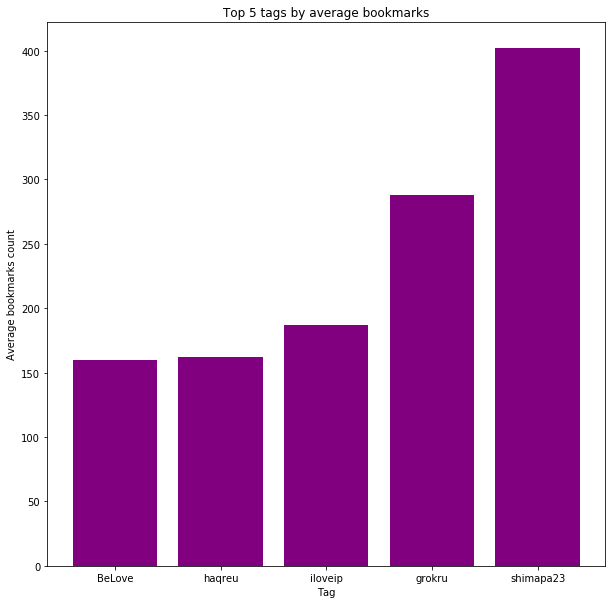

In [167]:
plt.figure(figsize=figsize)
top_bookmarks_authors = authors_stat_df[authors_stat_df['count'] > count_threshold // 10].sort_values('bookmarks_count').tail(5)
plt.title('Top 5 tags by average bookmarks')
plt.bar(top_bookmarks_authors['author'].values, top_bookmarks_authors['bookmarks_count'].values, color='purple')
plt.xlabel('Tag')
plt.ylabel('Average bookmarks count')
plt.show()

## Most commented

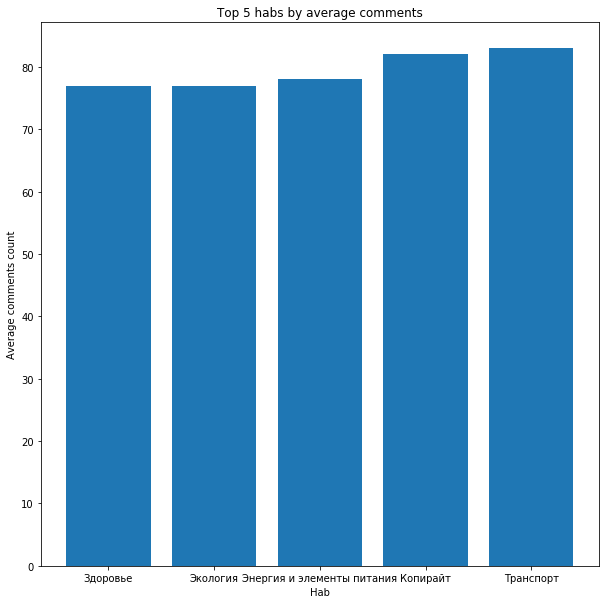

In [168]:
plt.figure(figsize=figsize)
top_comments_habs = habs_stat_df[habs_stat_df['count'] > count_threshold].sort_values('comments_count').tail(5)
plt.title('Top 5 habs by average comments')
plt.bar(top_comments_habs['hab'].values, top_comments_habs['comments_count'].values)
plt.xlabel('Hab')
plt.ylabel('Average comments count')
plt.show()

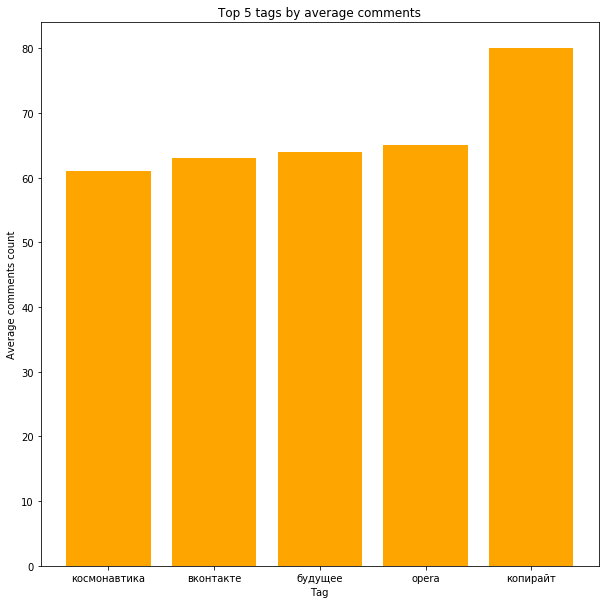

In [169]:
plt.figure(figsize=figsize)
top_comments_tags = tags_stat_df[tags_stat_df['count'] > count_threshold].sort_values('comments_count').tail(5)
plt.title('Top 5 tags by average comments')
plt.bar(top_comments_tags['tag'].values, top_comments_tags['comments_count'].values, color='orange')
plt.xlabel('Tag')
plt.ylabel('Average comments count')
plt.show()

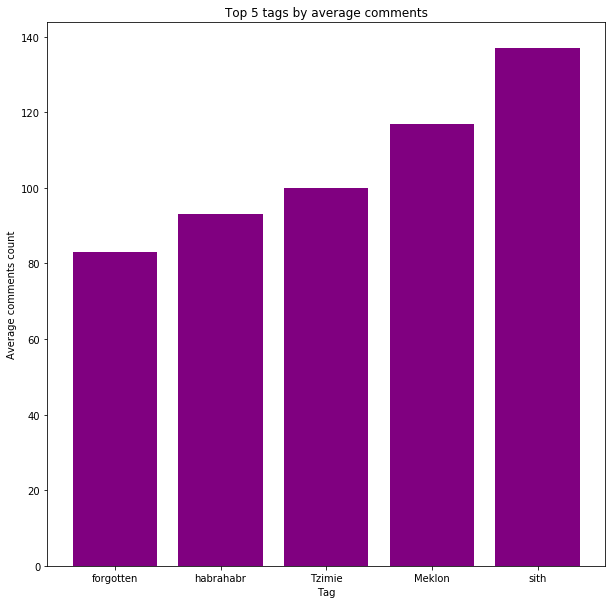

In [170]:
plt.figure(figsize=figsize)
top_comments_authors = authors_stat_df[authors_stat_df['count'] > count_threshold // 10].sort_values('comments_count').tail(5)
plt.title('Top 5 tags by average comments')
plt.bar(top_comments_authors['author'].values, top_comments_authors['comments_count'].values, color='purple')
plt.xlabel('Tag')
plt.ylabel('Average comments count')
plt.show()

In [2]:
import json
import numpy as np

with open('decoded_habs_list.json', 'r') as f:
    decoded_habs_list = [np.array(json.loads(s)) for s in f.readlines()]
len(decoded_habs_list), decoded_habs_list[:1]

(232127, [array([0, 0, 0, ..., 0, 0, 0])])

In [ ]:
from sklearn.man